# Dispositivos moviles

Vertex AI nos permite entrenar para dispositivos moviles, especialmente facil si usamos AutoML.

https://coral.ai/
https://developer.nvidia.com/embedded/jetson-nano-developer-kit

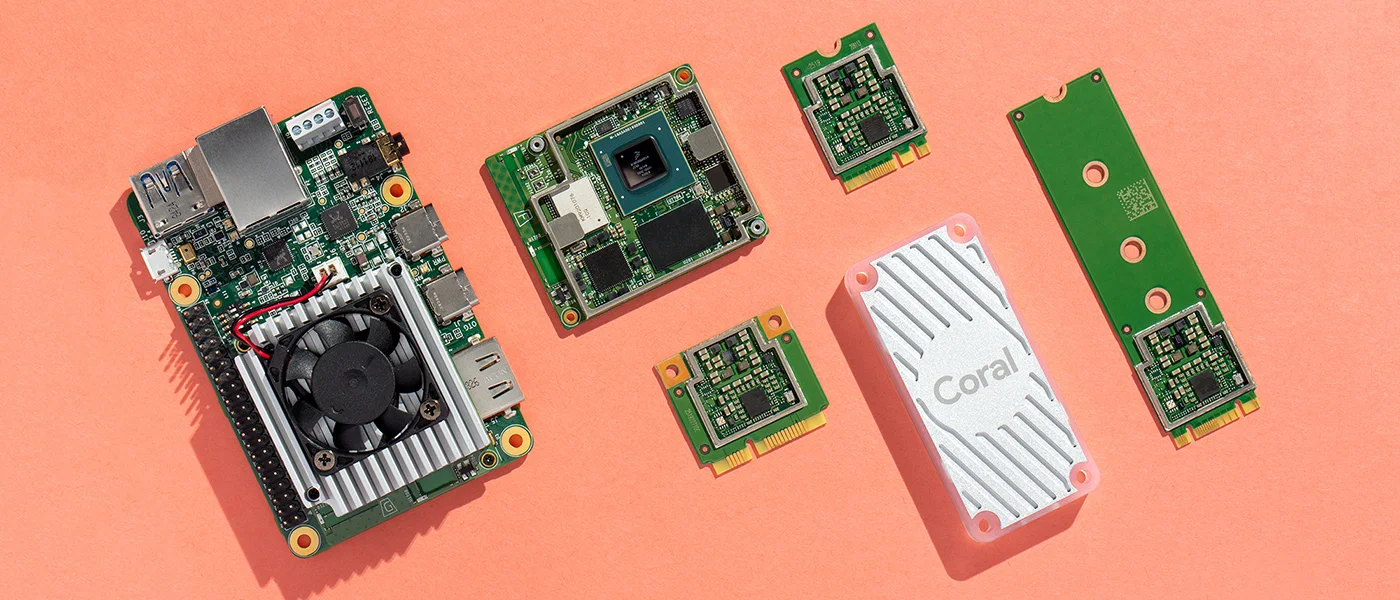

In [2]:
from IPython.display import Image, YouTubeVideo
Image("imagenes/coral.png")

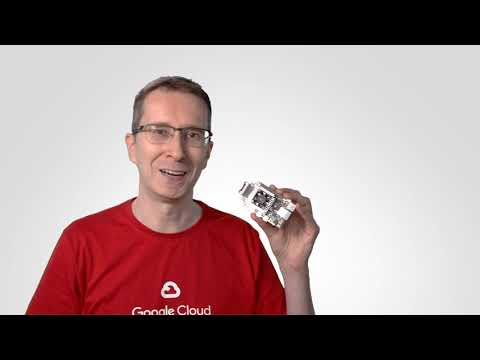

In [3]:
YouTubeVideo('-RpNI4ZrfIM', width=800, height=600)

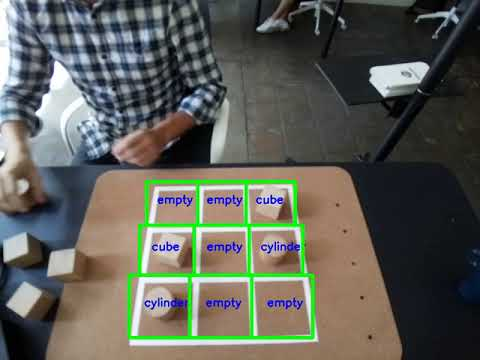

In [4]:
YouTubeVideo('JULOWyxyIFY', width=800, height=600)

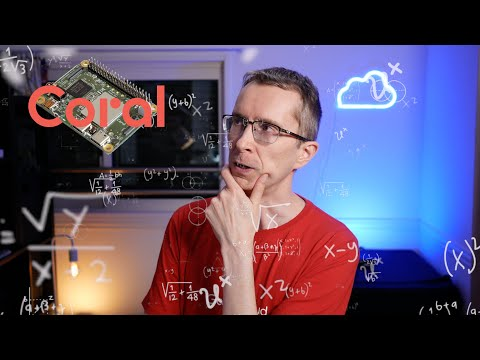

In [5]:
YouTubeVideo('nJ8Qs_RFWZc', width=800, height=600)

In [6]:
YouTubeVideo('bcM5AQSAzUY#t=300', width=800, height=600)

# Docker nVidia

[nVidia Docker](https://github.com/NVIDIA/nvidia-docker)

## Labelling on GCP

## Labelme

Labelme se trata de un software que facilita el etiquetado de imágenes. 
Como generar este tipo de archivos si usamos [labelme](https://github.com/wkentaro/labelme) 

In [ ]:
import json
from glob import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['figure.dpi'] = 144

JSON_PATH = ""
json_files = glob(JSON_PATH)

def getBBOX(points, imWidth, imHeight):
    xmin = np.min([points[0][0], points[1][0]]) / imWidth
    xmax = np.max([points[0][0], points[1][0]]) / imWidth
    ymin = np.min([points[0][1], points[1][1]]) / imHeight
    ymax = np.max([points[0][1], points[1][1]]) / imHeight

    A = f"{xmin},{ymin}"
    B = f"{xmax},{ymin}"
    C = f"{xmax},{ymax}"
    D = f"{xmin},{ymax}"
    allPoints = f"{A},{B},{C},{D}"
    return allPoints


for jsonf in tqdm(json_files):
    with open(jsonf, "r") as file:
        annotations = json.load(file)

        shapes = annotations['shapes']
        for shape in shapes:
            file_name = bucket_uri + "/" + jsonf.replace(".json", ".jpg").replace("\\", "/")
            file_name = file_name.replace("raw_imgs/v2/", "")
            label = shape['label']
            points = shape['points']
            bbox = getBBOX(points, annotations['imageWidth'], annotations['imageHeight'])
            rows.append([file_name, label, bbox])
df = pd.DataFrame(rows, columns=["GCS_FILE_PATH", "LABEL", "BBOX"])
points = df.BBOX.str.split(",", expand=True).astype(float).clip(0,1)
df.drop(columns="BBOX", inplace=True)
df = pd.concat([df, points], axis=1)
df.columns = ["image_path", "label", "X_MIN", "Y_MIN", "X_MAX", "Y_MIN", "X_MAX", "Y_MAX", "X_MIN", "Y_MAX"]

df.label.value_counts().plot(kind="bar")
df.to_csv("Input_file", index=False, header=None)

In [ ]:
# Object Detection

Input CSV sample
["image_path", "label", "X_MIN", "Y_MIN", "X_MAX", "Y_MIN", "X_MAX", "Y_MAX", "X_MIN", "Y_MAX"]
gs://ebc-images-sample2/blueblock/img0001.jpg,mug,0.13791899441340782,0.07120054725800935,0.7620460893854749,0.07120054725800935,0.7620460893854749,1.0,0.13791899441340782,1.0
gs://ebc-images-sample2/blueblock/img0001.jpg,welcome,0.40328212290502796,0.5101470755900127,0.645949720670391,0.5101470755900127,0.645949720670391,0.857883935697184,0.40328212290502796,0.857883935697184
gs://ebc-images-sample2/blueblock/img0002.jpg,mug,0.13791899441340782,0.07120054725800935,0.7620460893854749,0.07120054725800935,0.7620460893854749,1.0,0.13791899441340782,1.0
gs://ebc-images-sample2/blueblock/img0002.jpg,welcome,0.40328212290502796,0.5101470755900127,0.645949720670391,0.5101470755900127,0.645949720670391,0.857883935697184,0.40328212290502796,0.857883935697184
gs://ebc-images-sample2/blueblock/img0003.jpg,mug,0.13791899441340782,0.07120054725800935,0.7620460893854749,0.07120054725800935,0.7620460893854749,1.0,0.13791899441340782,1.0
gs://ebc-images-sample2/blueblock/img0003.jpg,welcome,0.40328212290502796,0.5101470755900127,0.645949720670391,0.5101470755900127,0.645949720670391,0.857883935697184,0.40328212290502796,0.857883935697184
gs://ebc-images-sample2/blueblock/img0004.jpg,mug,0.18505586592178772,0.07975145365408734,0.7620460893854749,0.07975145365408734,0.7620460893854749,1.0,0.18505586592178772,1.0